# Visualization with Seaborn
- ref: ref: http://shop.oreilly.com/product/0636920034919.do

Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.

**Seaborn Versus Matplotlib**


In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [9]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

In [10]:
x.shape

(500,)

In [12]:
y.shape

(500, 6)

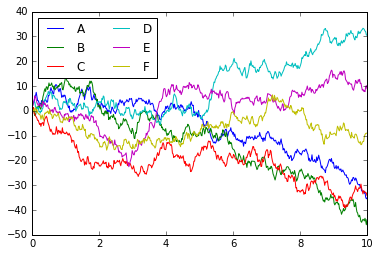

In [15]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Now let's take a look at how it works with Seaborn. As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn's set() method. By convention, Seaborn is imported as sns:

In [17]:
import seaborn as sns
sns.set()

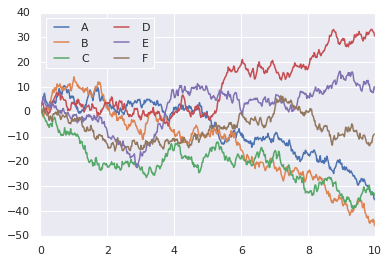

In [18]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Exploring Seaborn Plots
The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following could be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

#### Histograms, KDE, and densities
Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. We have seen that this is relatively straightforward in Matplotlib:

In [19]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)

In [22]:
data.shape

(2000, 2)

In [23]:
data = pd.DataFrame(data, columns=['x', 'y'])

In [24]:
data.head()

,x,y
0,-0.776033,-1.317985
1,-1.400358,0.986809
2,-1.274256,-0.186106
3,0.085385,-0.757594
4,0.201340,-0.034086


/home/tejakummarikuntla/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/tejakummarikuntla/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


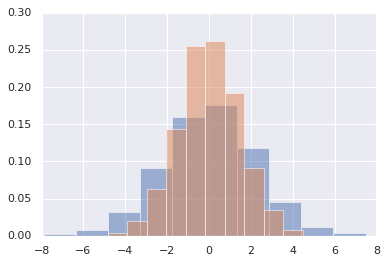

In [27]:
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

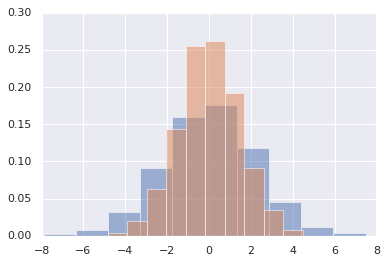

In [29]:
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with sns.kdeplot:

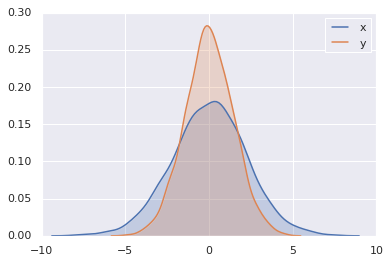

In [30]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using distplot:

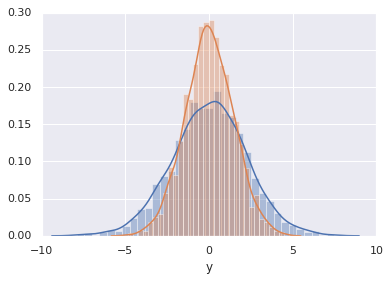

In [32]:
sns.distplot(data['x'])
sns.distplot(data['y'])

If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional visualization of the data:



/home/tejakummarikuntla/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


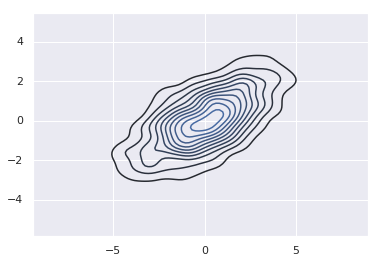

In [33]:
sns.kdeplot(data);

We can see the joint distribution and the marginal distributions together using sns.jointplot. For this plot, we'll set the style to a white background:



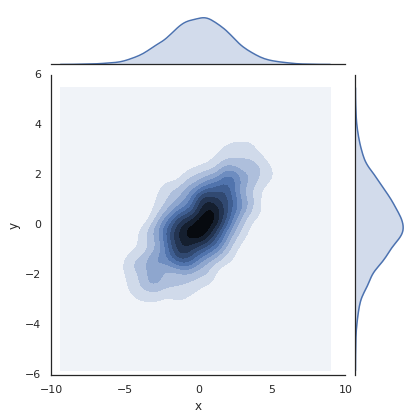

In [34]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');